<a href="https://colab.research.google.com/github/u-t-k-a-n/Detection-of-Similar-Points-in-Traffic-Characteristics/blob/main/DataVisualization_2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import os
import pandas as pd
import calendar
from matplotlib import pyplot as plt

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
path = "drive/MyDrive/2017_v1"
files = list()

In [11]:
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        files.append(os.path.join(dirname, filename))

In [12]:
def show_plotline_5minutes(filename,month,day):
  """ month: int 1 -> January
                 12 -> December
      day: int 0 -> Monday
               6 -> Sunday
  """
  df = pd.read_csv(filename)
  size = (24 * 60) // 5
  plt.figure(figsize=(24,20))
  graph = pd.DataFrame(columns=["i","day","month","year"])
  index = 1

  for i in range(0,len(df),size):
    date = df.iloc[i]["time"]
    year = int(date[:4])
    month_ = int(date[5:7])
    day_ = int(date[8:10])
    

    if month == month_ and day == calendar.weekday(year,month_,day_):
      index += 1
      graph.loc[date] = [i,day_,month_,year]
      

  for j in range(1,index):
    plt.subplot(3,2,j,title="Traffic Flow Speed in 5 Minutes",
                  xlabel="{}/{}/{}".format(graph.iloc[j-1]["day"],graph.iloc[j-1]["month"],graph.iloc[j-1]["year"]),
                  ylabel="Speed (km/h)")
    plt.plot(df[graph.iloc[j-1]["i"]:graph.iloc[j-1]["i"]+size]["time"],
               df[graph.iloc[j-1]["i"]:graph.iloc[j-1]["i"]+size]["speed"])


  

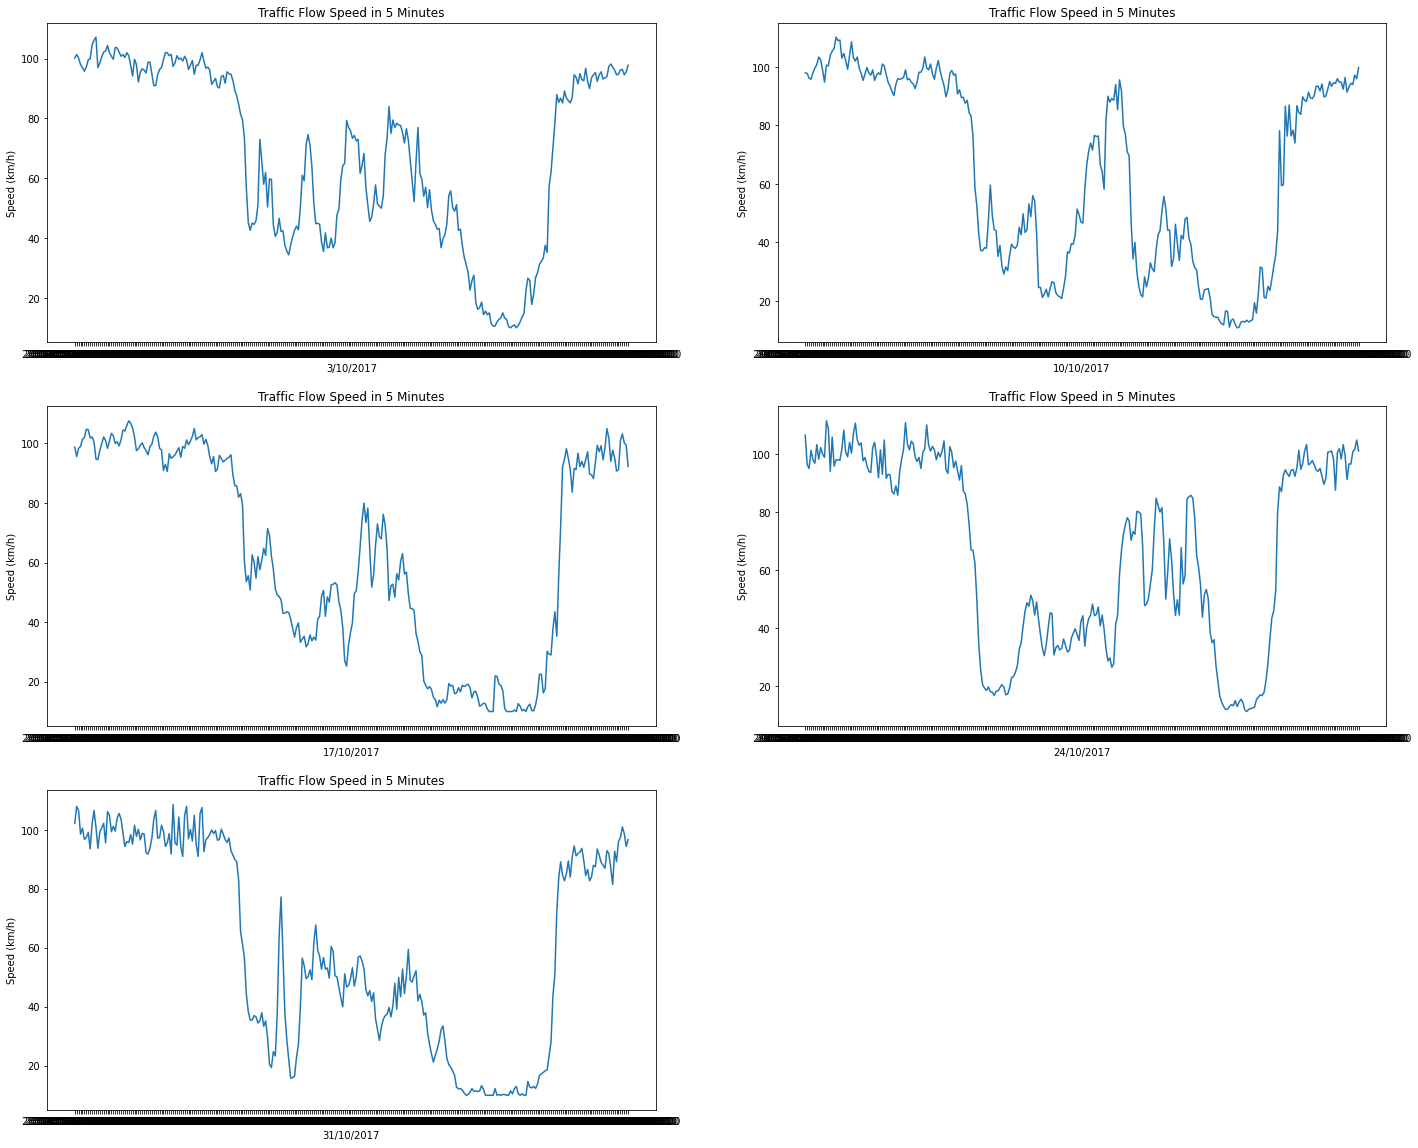

In [6]:
show_plotline_5minutes(files[0],10,1)

In [73]:
def show_barplot_5minutes(filename,month,day):
  """ month: int 1 -> January
                 12 -> December
      day: int 0 -> Monday
               6 -> Sunday
  """
  df = pd.read_csv(filename)
  size = (24 * 60) // 5
  plt.figure(figsize=(24,20))
  graph = pd.DataFrame(columns=["i","day","month","year"])
  speed_categories = pd.DataFrame(columns=["cat1","cat2","cat3","cat4","cat5",
                                          "cat6","cat7","cat8","cat9","cat10",
                                          "cat11","cat12"])

  """ cat1 -> 10 km/h to 20 km/h
      cat2 -> 20 km/h to 30 km/h
      cat3 -> 30 km/h to 40 km/h
      cat4 -> 40 km/h to 50 km/h
      cat5 -> 50 km/h to 60 km/h
      cat6 -> 60 km/h to 70 km/h
      cat7 -> 70 km/h to 80 km/h
      cat8 -> 80 km/h to 90 km/h
      cat9 -> 90 km/h to 100 km/h
      cat10 -> 100 km/h to 110 km/h
      cat11 -> 110 km/h to 120 km/h
      cat12 -> 120 km/h to 130 km/h
  """
  index = 1

  for i in range(0,len(df),size):
    date = df.iloc[i]["time"]
    year = int(date[:4])
    month_ = int(date[5:7])
    day_ = int(date[8:10])
    

    if month == month_ and day == calendar.weekday(year,month_,day_):
      index += 1
      graph.loc[date] = [i,day_,month_,year]

  for j in range(len(graph)):
    speed_categories.loc[graph.iloc[j]["day"]] = [len(df[graph.iloc[j]["i"]:graph.iloc[j]["i"]+size][(df["speed"]>=10) & (df["speed"]<20)]),
                                                   len(df[graph.iloc[j]["i"]:graph.iloc[j]["i"]+size][(df["speed"]>=20) & (df["speed"]<30)]),
                                                   len(df[graph.iloc[j]["i"]:graph.iloc[j]["i"]+size][(df["speed"]>=30) & (df["speed"]<40)]),
                                                   len(df[graph.iloc[j]["i"]:graph.iloc[j]["i"]+size][(df["speed"]>=40) & (df["speed"]<50)]),
                                                   len(df[graph.iloc[j]["i"]:graph.iloc[j]["i"]+size][(df["speed"]>=50) & (df["speed"]<60)]),
                                                   len(df[graph.iloc[j]["i"]:graph.iloc[j]["i"]+size][(df["speed"]>=60) & (df["speed"]<70)]),
                                                   len(df[graph.iloc[j]["i"]:graph.iloc[j]["i"]+size][(df["speed"]>=70) & (df["speed"]<80)]),
                                                   len(df[graph.iloc[j]["i"]:graph.iloc[j]["i"]+size][(df["speed"]>=80) & (df["speed"]<90)]),
                                                   len(df[graph.iloc[j]["i"]:graph.iloc[j]["i"]+size][(df["speed"]>=90) & (df["speed"]<100)]),
                                                   len(df[graph.iloc[j]["i"]:graph.iloc[j]["i"]+size][(df["speed"]>=100) & (df["speed"]<110)]),
                                                   len(df[graph.iloc[j]["i"]:graph.iloc[j]["i"]+size][(df["speed"]>=110) & (df["speed"]<120)]),
                                                   len(df[graph.iloc[j]["i"]:graph.iloc[j]["i"]+size][(df["speed"]>=120) & (df["speed"]<=130)]),
                                                   ]



  for j in range(1,index):
    plt.subplot(3,2,j,title="Traffic Flow Speed Histogram in 5 Minutes",
                  xlabel="{}/{}/{}".format(graph.iloc[j-1]["day"],graph.iloc[j-1]["month"],graph.iloc[j-1]["year"]),
                  ylabel="Speed (km/h)")
    plt.bar(speed_categories.columns,speed_categories.iloc[j-1])


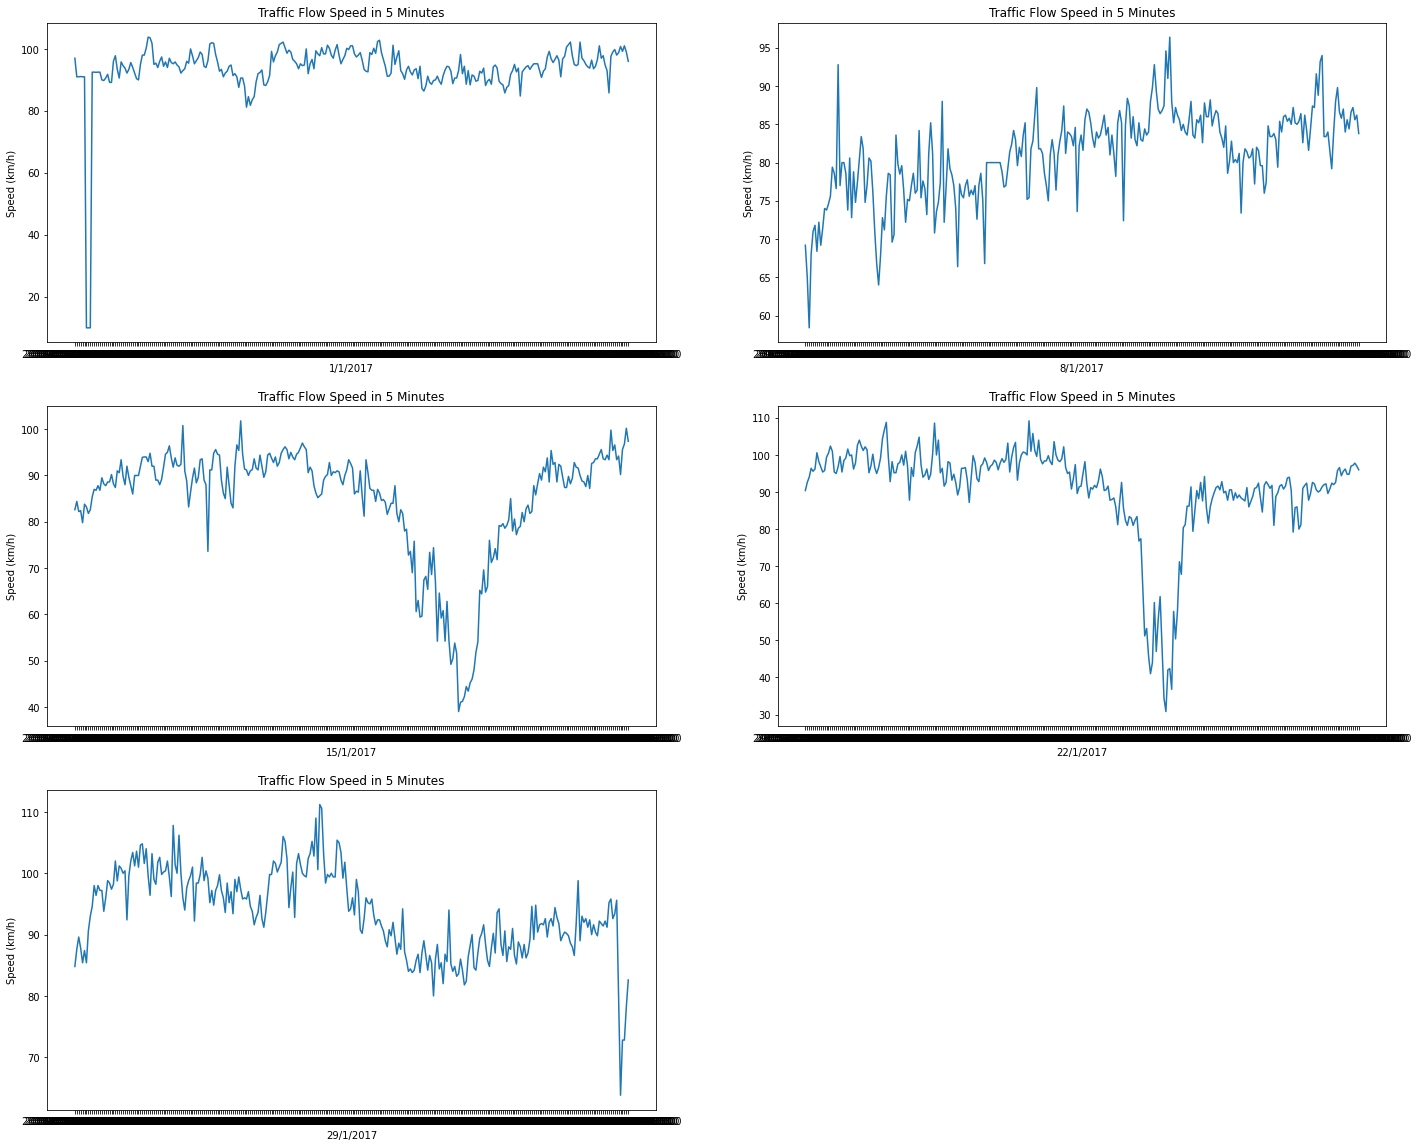

In [51]:
show_plotline_5minutes(files[0],1,6)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/li

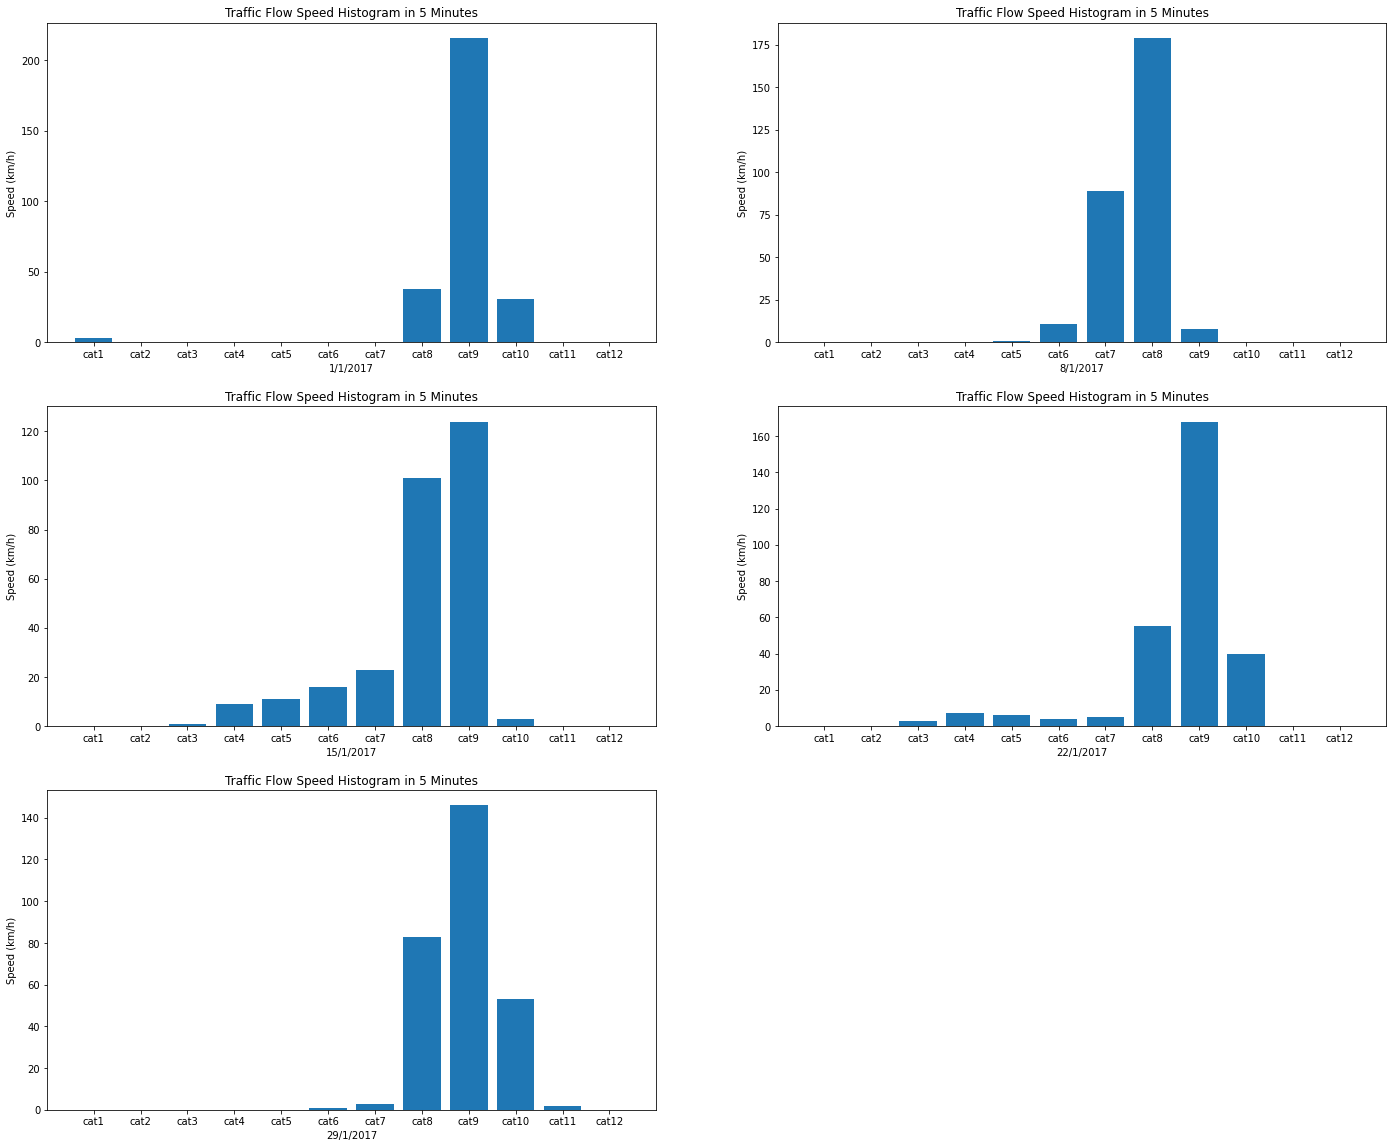

In [75]:
show_barplot_5minutes(files[0],1,6)